# <center>Data Mining Project Code</center>

** **
## <center>*03 - XXXX*</center>

** **

In this notebook, we start our customer segmentation using two different partitioning methods: K-means and K-medoids. Each algorithm is going to be applied to different datasets which suffered from different transformations.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# ToC

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

1. [Clustering](#2.-Clustering) <br><br>


In [6]:
import pandas as pd
import numpy as np
from IPython.display import display 


# Clustering algorithms
from sklearn.cluster import KMeans

# Segmentation
import segmentation as s

# Visualizations
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# 1. Importing Libraries & Data

In [7]:
data = pd.read_csv('data/preprocessed_data.csv', 
                   index_col = "customer_id")
spending_data = data[s.spending_orders]
spending_data = data.select_dtypes(include=['float64', 'int64'])
spending_data

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,promo_DELIVERY,promo_DISCOUNT,promo_FREEBIE,pay_CARD,pay_CASH,last_promo_enc,payment_method_enc,days_between,total_orders,avg_order_hour,total_spend,avg_spend_prod,is_repeat_customer,avg_prod_vendor,avg_orders_vendor,avg_prod_order,weekend_orders,weekday_orders,weekend_weekday_ratio,num_cuisines,average_spend_per_cuisine,CUI_American_ratio,CUI_Asian_ratio,CUI_Beverages_ratio,CUI_Cafe_ratio,CUI_Chicken Dishes_ratio,CUI_Chinese_ratio,CUI_Desserts_ratio,CUI_Healthy_ratio,CUI_Indian_ratio,CUI_Italian_ratio,CUI_Japanese_ratio,CUI_Noodle Dishes_ratio,CUI_OTHER_ratio,CUI_Street Food / Snacks_ratio,CUI_Thai_ratio,DOW_0_ratio,DOW_1_ratio,DOW_2_ratio,DOW_3_ratio,DOW_4_ratio,DOW_5_ratio,DOW_6_ratio,HR_0_ratio,HR_1_ratio,HR_2_ratio,HR_3_ratio,HR_4_ratio,HR_5_ratio,HR_6_ratio,HR_7_ratio,HR_8_ratio,HR_9_ratio,HR_10_ratio,HR_11_ratio,HR_12_ratio,HR_13_ratio,HR_14_ratio,HR_15_ratio,HR_16_ratio,HR_17_ratio,HR_18_ratio,HR_19_ratio,HR_20_ratio,HR_21_ratio,HR_22_ratio,HR_23_ratio,0_7h,8_14h,15_19h,20_23h
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1.0,6090,1,2,18.0,28.88,5.776,1,2.5,1.0,2.5,2,0,2.0,1,28.880,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,2,0
5d272b9dcb,8670,17.0,2,2,2,0,1,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,6090,1,2,10.5,19.21,9.605,1,1.0,1.0,1.0,2,0,2.0,2,9.605,0.667361,0.332639,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0,0
f6d1b2ba63,4660,38.0,1,2,2,0,1,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,5619,1,2,10.0,9.20,4.600,1,2.0,2.0,1.0,2,0,2.0,1,9.200,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0,0
180c632ed8,4660,26.0,2,3,1,0,2,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,6090,2,2,12.5,31.56,10.520,1,1.5,1.0,1.5,1,1,1.0,2,15.780,0.000000,0.434094,0.0,0.0,0.0,0.0,0.0,0.0,0.565906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0,0
4eb37a6705,4660,20.0,2,5,0,0,2,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6090,2,2,8.5,55.44,11.088,1,2.5,1.0,2.5,1,1,1.0,2,27.720,0.262807,0.737193,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# 2. Clustering

## 2.1 Hierarchical Clustering

## 2.2 K-Means

In [8]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(spending_data)
    dispersion.append(kmeans.inertia_)

**Elbow Method**

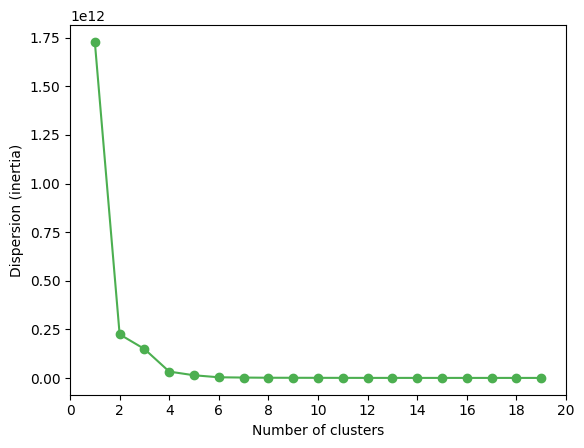

In [9]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

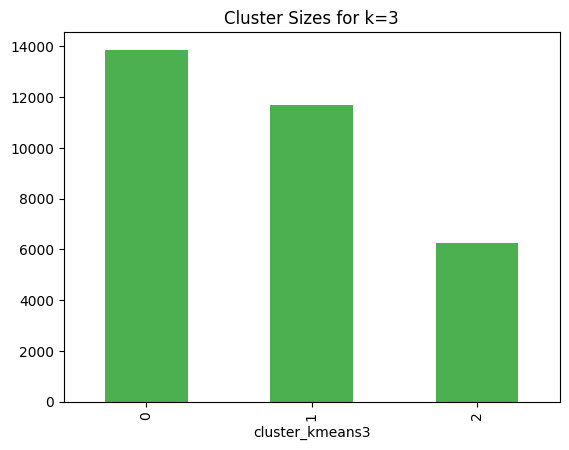

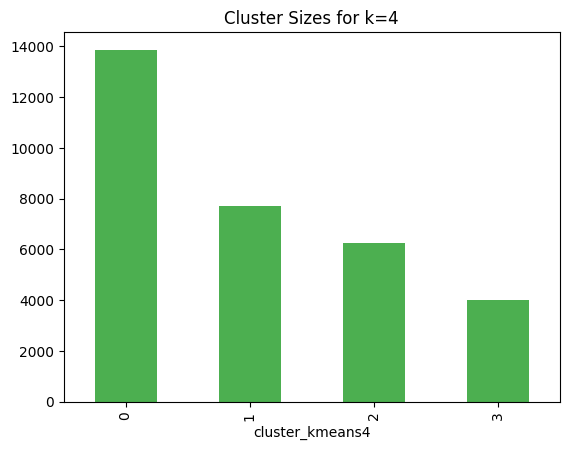

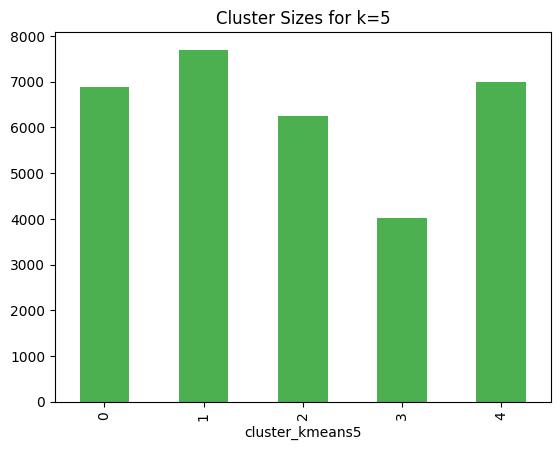

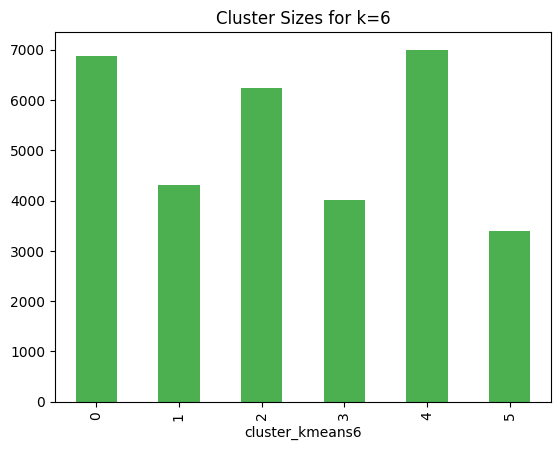

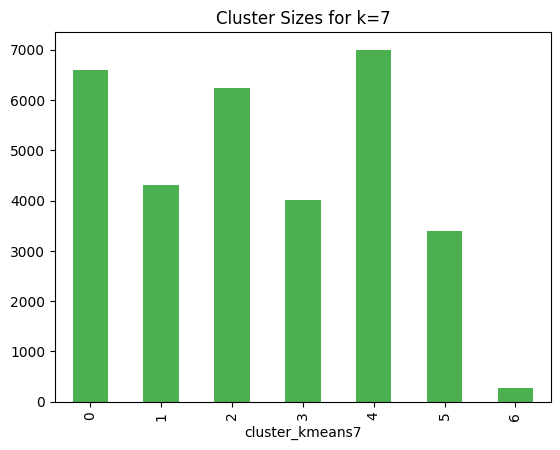

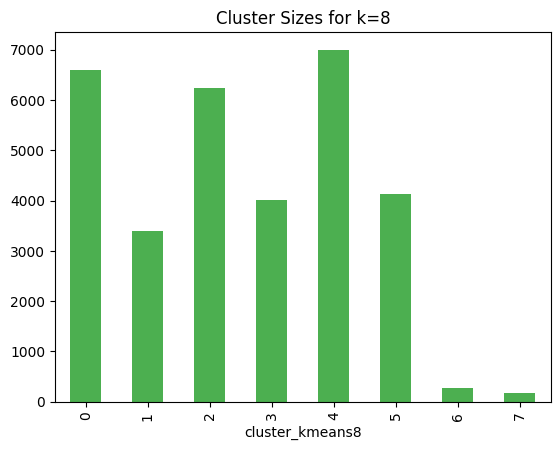

In [10]:
possible_k = [3, 4, 5, 6, 7, 8]

for k in possible_k:
    
    spending_data_copy = spending_data.copy()
    
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(spending_data_copy)  
    clusters  = kmeans.predict(spending_data_copy)  
    
    spending_data_copy[f'cluster_kmeans{k}'] = clusters 
    
    spending_data_copy.groupby([f'cluster_kmeans{k}']).size().plot(kind='bar', 
                                                          color='#4CAF50') 
    plt.title(f'Cluster Sizes for k={k}')
    plt.show()

In [11]:
for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(spending_data_copy)  
    clusters = kmeans.predict(spending_data_copy)  

    # Add the cluster assignments to the DataFrame
    data[f'cluster_kmeans{k}'] = clusters 

    # Compute mean values grouped by clusters and transpose
    cluster_means = spending_data_copy.groupby([f'cluster_kmeans{k}']).mean().T

    print(f"\nMean values for k={k}:")
    display(cluster_means)

KeyError: 'cluster_kmeans3'